# Polynomial Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

(array([12.,  6.,  4., 10., 18., 15.,  8.,  8.,  8., 11.]),
 array([0.00135435, 0.09935879, 0.19736322, 0.29536765, 0.39337208,
        0.49137652, 0.58938095, 0.68738538, 0.78538981, 0.88339424,
        0.98139868]),
 <a list of 10 Patch objects>)

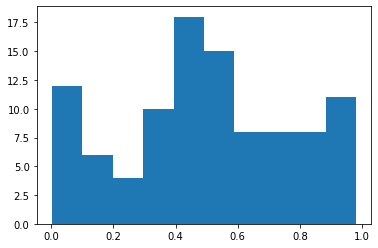

In [3]:
plt.hist(np.random.rand(m, 1))

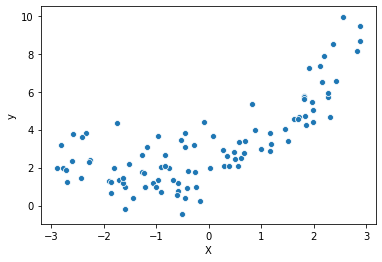

In [4]:
df = pd.DataFrame({'X': list(X), 'y': list(y)})
sns.scatterplot(x='X', y='y', data=df)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
lin_model = LinearRegression()
lin_model.fit(X, y)
y_lin_pred = lin_model.predict(X)
df['y_lin_pred'] = y_lin_pred
print(lin_model.intercept_)
print(lin_model.coef_)

[3.25786942]
[[1.00919347]]


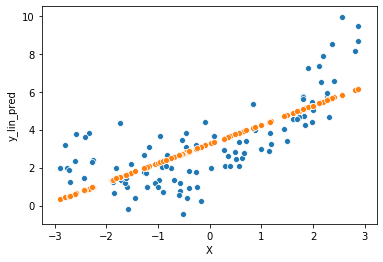

In [7]:
sns.scatterplot(x='X', y='y', data=df)
sns.scatterplot(x='X', y=df['y_lin_pred'], data=df)

## Clearly a straight line will never fit the graph properly

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [10]:
poly_features

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [11]:
X_poly = poly_features.fit_transform(X)
X[0]

array([2.70229861])

In [35]:
X_poly[0]

array([1.25017483, 1.56293711])

In [36]:
1.25017483 * 1.25017483

1.5629371055655288

In [37]:
# X_poly now contains X as well as X^2

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

model = LinearRegression()
model.fit(X_poly, y)
print(model.intercept_)
print(model.coef_)

[1.84418809]
[[1.04352317 0.48515089]]


# That is we predict  y = 0.485 * X^2 + 1.043 * X + 1.84

# while the actual is y = 0.5 * X^2 + 1.0 * X + 2.0 + Gaussian noise

In [16]:
y_pred = model.predict(X_poly)
df['y_pred'] = y_pred
df.head()

,X,y,y_lin_pred,y_pred
0,[2.7022986061593635],[7.854306762460375],6.610183,8.206874
1,[0.22720229606168285],[1.072294069501757],3.592782,2.106323
2,[0.12092711952081281],[1.0759154922029524],3.463222,1.977473
3,[-0.062008143438406105],[3.701046265197275],3.240204,1.781347
4,[-1.9293015152531936],[1.4127797331975807],0.963778,1.636748


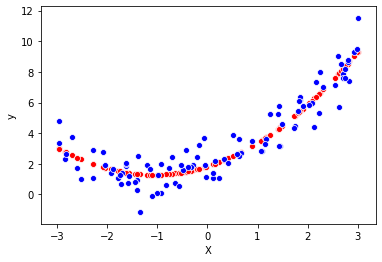

In [17]:
sns.scatterplot(x='X', y=df['y_pred'], data=df, color='red')
sns.scatterplot(x='X', y='y', data=df, color='blue')

## You can fit a higher degree polynomial

In [18]:
poly20 = PolynomialFeatures(degree=20, include_bias=True)
X_poly20 = poly20.fit_transform(X)
model20 = LinearRegression()
model20.fit(X_poly20, y)
y_pred20 = model20.predict(X_poly20)


In [19]:
df['y_pred20'] = y_pred20
df.head()

,X,y,y_lin_pred,y_pred,y_pred20
0,[2.7022986061593635],[7.854306762460375],6.610183,8.206874,7.780275
1,[0.22720229606168285],[1.072294069501757],3.592782,2.106323,1.930676
2,[0.12092711952081281],[1.0759154922029524],3.463222,1.977473,1.882599
3,[-0.062008143438406105],[3.701046265197275],3.240204,1.781347,2.022381
4,[-1.9293015152531936],[1.4127797331975807],0.963778,1.636748,1.794865


In [20]:
print('Root Mean Squared Error with 1-degree polynomial:', np.sqrt(metrics.mean_squared_error(y, y_lin_pred)))
print('Root Mean Squared Error with 2-degree polynomial:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Root Mean Squared Error with 20-degree polynomial ', np.sqrt(metrics.mean_squared_error(y, y_pred20)))

Root Mean Squared Error with 1-degree polynomial: 1.5849303095072518
Root Mean Squared Error with 2-degree polynomial: 0.8888178025098263
Root Mean Squared Error with 20-degree polynomial  0.7908164434711348


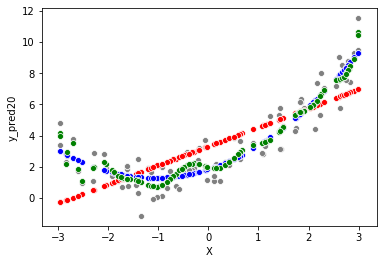

In [27]:
sns.scatterplot(x='X', y='y', data=df, color='gray')
sns.scatterplot(x='X', y=df['y_lin_pred'], data=df, color='red')
sns.scatterplot(x='X', y=df['y_pred'], data=df, color='blue')
sns.scatterplot(x='X', y=df['y_pred20'], data=df, color='green')

## Green line has LOWEST root mean square ERROR than the Red Line

## HOWEVER, Green line may be OVERFITTING while RED line UNDERFIT